In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

<Figure size 1000x600 with 0 Axes>

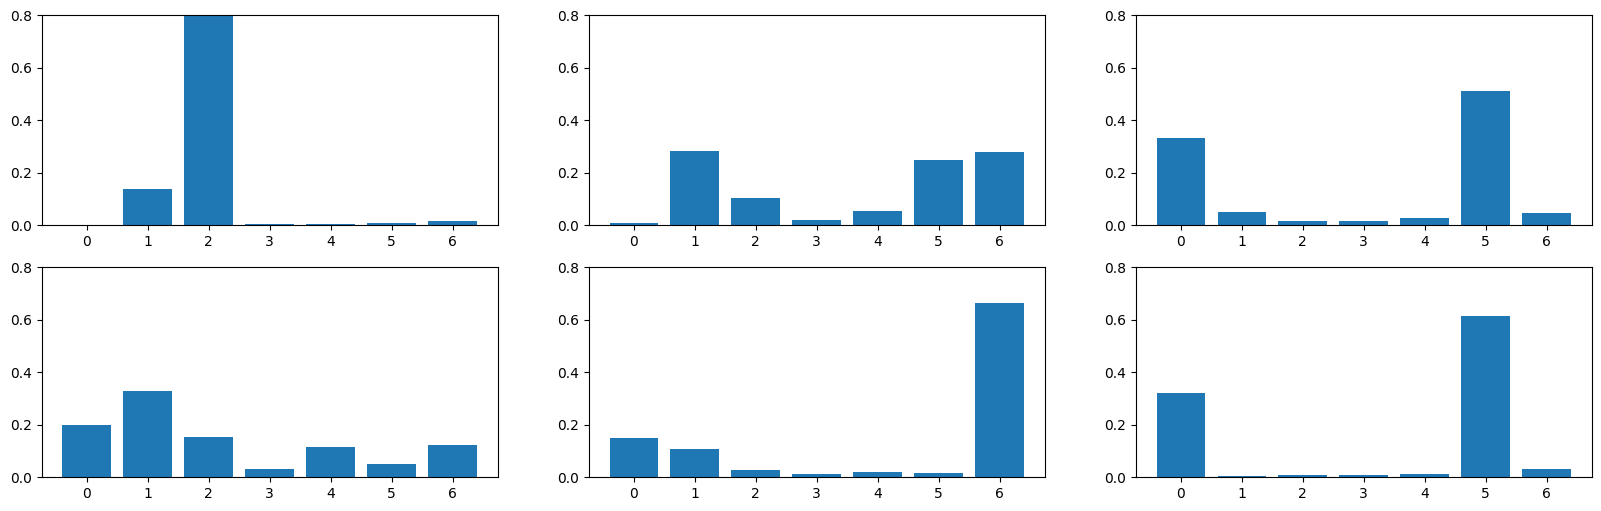

In [2]:
# for some reason the flow environment is trading faster 
# doesn't make much sense 

plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 3, figsize=(20, 6))
time = np.arange(0, 155, 15)
for i, market in enumerate(['noise', 'flow', 'strategic']):
    for rl in ['log_normal']:
        for j, lots in enumerate([20, 60]):
            ax = axs[j, i]
            # 10000 or 1000 doesnt make a difference
            path = f'{parent_dir}/actions/{market}_{lots}_{rl}.npz'
            data = np.load(path)['actions']  # shape (N, num_steps)
            mean_action = np.mean(data, axis=0)
            ax.bar(np.arange(len(mean_action)), mean_action)
            ax.set_ylim(0, 0.8)
        # if i == 0:
            # ax.legend()
            # ax.set_ylabel('Volume')
        # ax.grid(axis='y', linestyle='--', alpha=0.7)
    # ax.set_title(f'{market.capitalize()}')
plt.show()

#############
generating plots for  noise


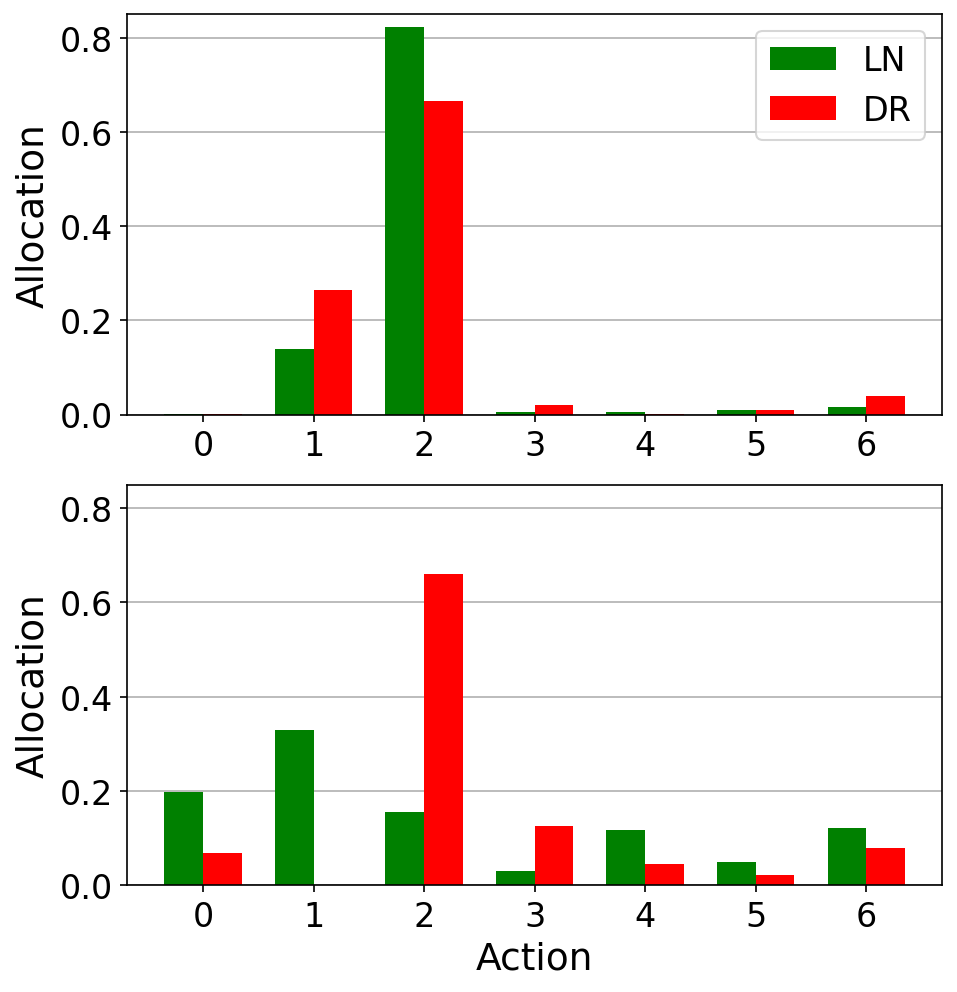

#############
generating plots for  flow


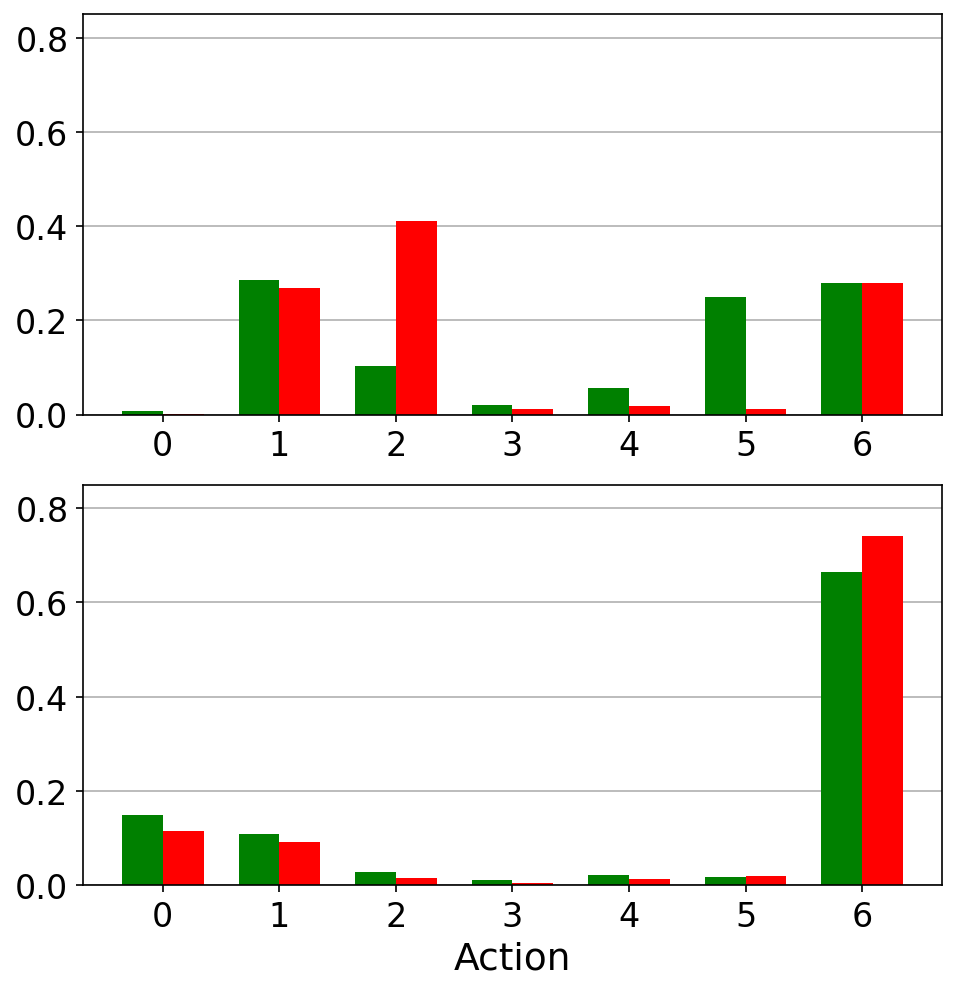

#############
generating plots for  strategic


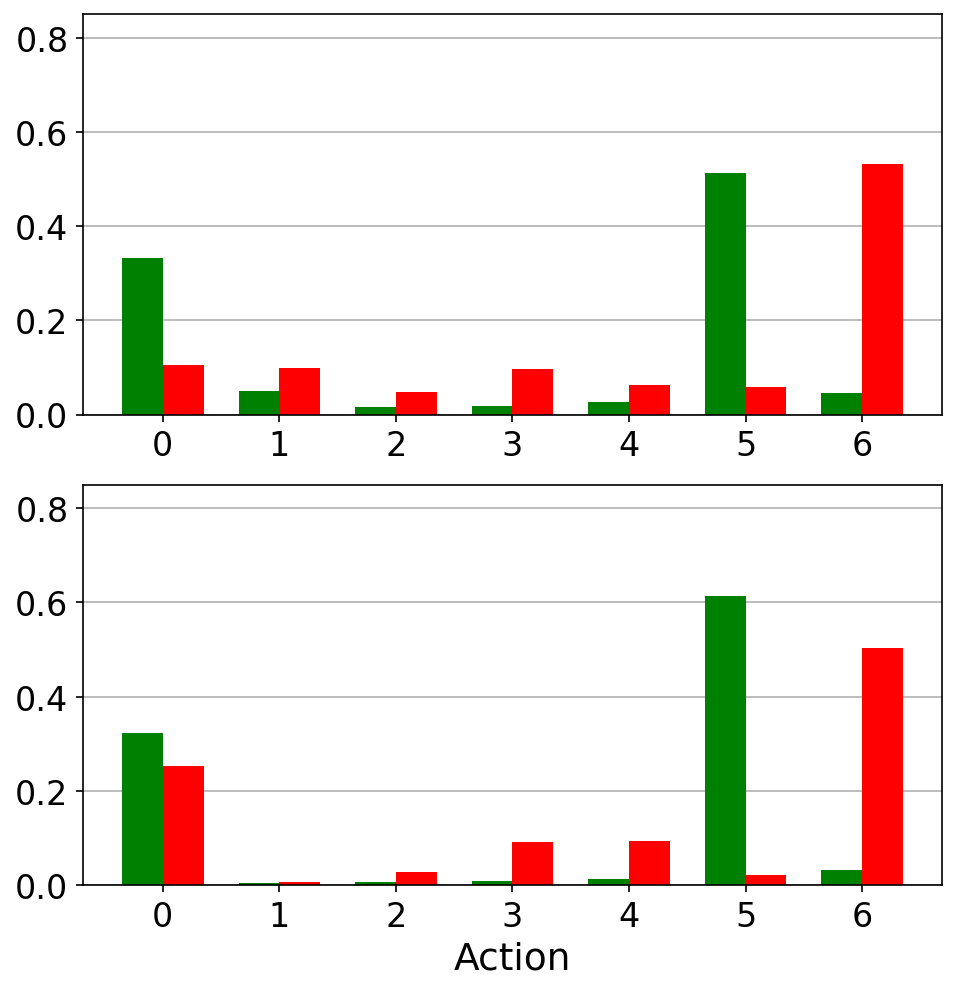

In [4]:
lots_list = [20, 60]
textwidth = 6.75
textheight = 7
scale = 3.2
rl = 'log_normal'  # ensure rl is defined

tag = 'deterministic_action'  # for reward plots consistency
tag = None  # for action plots

for env in ['noise', 'flow', 'strategic']:
    print('#############')
    print('generating plots for ', env)
    fig, axs = plt.subplots(2, 1, figsize=(scale*0.3*textwidth, scale*0.3*textheight), dpi=150)
    for j, lots in enumerate(lots_list):
        ax = axs[j]
        for rl in ['log_normal', 'dirichlet']:
            if tag: 
                path = f'{parent_dir}/actions/{env}_{lots}_{rl}_{tag}.npz'  # use env, not market
            else:
                path = f'{parent_dir}/actions/{env}_{lots}_{rl}.npz'  # use env, not market
            data = np.load(path)['actions']
            mean_action = np.mean(data, axis=0)
            n = len(mean_action)
            inds = np.arange(n)
            width = 0.35
            if rl == 'log_normal':
                ax.bar(inds - width/2, mean_action, width=width, label='LN', color='green')
            else:
                ax.bar(inds + width/2, mean_action, width=width, label='DR', color='red')
            if env == 'noise' and lots == 20:
                ax.legend(prop={'size': 16}, loc='upper right')
            ax.set_xticks(inds)
            # ax.set_xticklabels([f'$a_{{{i}}}$' for i in range(n)], fontsize=14)
            tick_size = 16
            ax.tick_params(axis='x', labelsize=tick_size)
            ax.tick_params(axis='y', labelsize=tick_size)
            ax.set_axisbelow(True)
            ax.grid(axis='y', linestyle='-', alpha=1.0)
            ax.set_ylim(0, 0.85)
            if lots == 60:
                ax.set_xlabel('Action', fontsize=18)
            if env == 'noise':
                ax.set_ylabel(f'Allocation', fontsize=18)
    fig.tight_layout()
    if tag:
        fig.savefig(f'{parent_dir}/plots/actions_{env}_{tag}.pdf')
    else:
        fig.savefig(f'{parent_dir}/plots/actions_{env}.pdf')
    plt.show()
    plt.close(fig)